In [ ]:
#Importando as bibliotecas

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sf

In [ ]:
HIGH-PASS WINDOWED-SINC FILTER

In [ ]:
#Declarando as variaveis que serão utilizadas
#Iniciando as listas com todas as posições = 0

In [36]:
X = np.zeros(4999)
Y = np.zeros(4999)
H = np.zeros(100)

Fs = 8000 #Frequencia
FC = (400/8000) #Frequencia de corte
tam = 100 #Tamanho do filtro
#tam = 32

In [2]:
#Para utilizar um arquivo de coeficientes
#Utiliza a função split para salvar em uma nova lista os valores, sendo eles seprados na ','
#Após a separação, salva em uma nova lista H os valores que foram transformados de string para float

In [31]:
#Le os coeficientes de um arquivo
with open("coef_32.dat") as file:
    for line in file.readlines():
        aux = line.split(',') #Quebra na virgula e salva em uma nova lista

H = []
for val in aux:
    H.append(float(val)) #Altera os valores de string para float

In [ ]:
#Laço de repetição ára gerar a lista de coeficientes

In [37]:
#Gera os coeficientes
for i in range(len(H)):
    if(i-(tam/2) == 0):
        H[i] = 2* np.pi * FC
    if(i - tam/2) != 0:
        H[i] = np.sin(2 * np.pi * FC * (i-tam/2)) / (i - tam/2)
    H[i] = H[i]*(0.54-0.46*np.cos(2*np.pi*(i/tam)))

In [ ]:
# Em primeiro momento realiza a soma de todos os coeficientes
# Após isso ele divide os valores de H pelo valor da soma total
# Realiza a convolução

In [38]:
SUM = 0
#Soma todos os coeficientes
for i in range(len(H)):
    SUM = SUM + H[i] 

#Divide os coefiecientes pela soma de todos eles
for i in range(len(H)):
    H[i] = H[i] / SUM

for j in range(100, 4999): 
    Y[j] = 0
    for i in range(len(H)):
        Y[j] = Y[j] + X[j-i] * H[i]

In [ ]:
#Multiplica os valores de H por -1, assim invertendo o resultado
#Se acaso tam/2 for igual ao i, adiciona + 1 ao valor de H[i]

In [39]:
for i in range(tam):
    H[i] = H[i] * -1
    if( i == (tam/2)):
        H[i] +=1

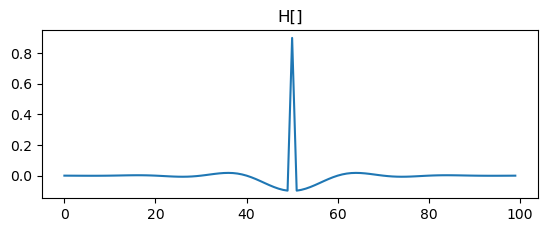

In [40]:
#Plotando o gráfico
plt.subplot(2, 1, 1)
plt.title("H[]")
plt.plot(H)

In [5]:
#Calcula a freqz e plota o grafico

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

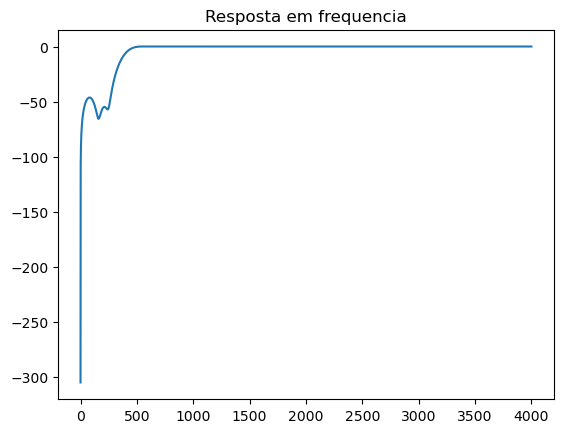

In [41]:
[w, H] = sf.freqz(H, 1,Fs)
plt.plot(w*Fs/(2*np.pi), 20*np.log10(abs(H)))
plt.title('Resposta em frequencia')
plt.grid